# EDA

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS


In [2]:
df_one = pd.read_csv('data/raw/Truth_Seeker_Model_Dataset.csv',
                                        on_bad_lines = 'skip',
                                        encoding = 'utf-8')
df_two = pd.read_csv('data/raw/Features_For_Traditional_ML_Techniques.csv',
                                                    on_bad_lines = 'skip',
                                                    encoding = 'utf-8')

In [3]:
df_one = df_one.drop(['Unnamed: 0', 'statement', 'target', 'BinaryNumTarget'], axis = 1)
df_two = df_two.drop(['Unnamed: 0'], axis = 1)

In [4]:
df = pd.merge(df_one, df_two, how = 'left', on = 'tweet')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 67 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   author                   134198 non-null  object 
 1   manual_keywords          134198 non-null  object 
 2   tweet                    134198 non-null  object 
 3   5_label_majority_answer  134198 non-null  object 
 4   3_label_majority_answer  134198 non-null  object 
 5   majority_target          134198 non-null  bool   
 6   statement                134198 non-null  object 
 7   BinaryNumTarget          134198 non-null  float64
 8   followers_count          134198 non-null  float64
 9   friends_count            134198 non-null  float64
 10  favourites_count         134198 non-null  float64
 11  statuses_count           134198 non-null  float64
 12  listed_count             134198 non-null  float64
 13  following                134198 non-null  float64
 14  embe

In [6]:
df = df.drop(['embeddings', 'statement', 'author', 'manual_keywords', 'majority_target', '5_label_majority_answer',
              '3_label_majority_answer'], axis = 1)

In [7]:
numerical_columns = df.select_dtypes(include = np.number).columns.tolist()
corr = df[numerical_columns].corr()['BinaryNumTarget'].abs()
print(corr.sort_values(ascending = False))

BinaryNumTarget           1.000000
URLs                      0.136375
normalize_influence       0.131866
pronouns                  0.114162
cred                      0.111584
PERSON_percentage         0.111567
hashtags                  0.105710
past_verbs                0.092284
present_verbs             0.092082
short_word_freq           0.087121
capitals                  0.081786
Word count                0.079875
statuses_count            0.077732
MONEY_percentage          0.077220
CARDINAL_percentage       0.075818
unique_count              0.071814
exclamation               0.068000
NORP_percentage           0.057028
adjectives                0.052809
TOs                       0.051943
adverbs                   0.049680
mentions                  0.049086
GPE_percentage            0.047484
Average word length       0.045793
conjunctions              0.045761
questions                 0.044242
favourites_count          0.044088
total_count               0.040115
ORG_percentage      

In [8]:
weak_corr = corr[corr < 0.05].index.tolist()
df = df.drop(columns = weak_corr)
df.head()

,tweet,BinaryNumTarget,statuses_count,following,cred,normalize_influence,hashtags,URLs,unique_count,NORP_percentage,...,CARDINAL_percentage,Word count,present_verbs,past_verbs,adjectives,pronouns,TOs,exclamation,capitals,short_word_freq
0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,1.0,16423.0,0.0,0.540794,0.104602,0.0,1.0,5,0.166667,...,0.0,42,1,1,1,1,0,0,33,19
1,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1.0,37184.0,0.0,0.462177,0.094436,0.0,1.0,2,0.250000,...,0.0,51,7,2,2,8,2,0,14,34
2,THE SUPREME COURT is siding with super rich pr...,1.0,1184.0,0.0,0.096774,0.039846,0.0,1.0,1,1.000000,...,0.0,26,0,0,7,0,1,0,3,10
3,@POTUS Biden Blunders\n\nBroken campaign promi...,1.0,16423.0,0.0,0.540794,0.104602,0.0,1.0,4,0.333333,...,0.0,49,4,6,3,1,1,0,6,30
4,@OhComfy I agree. The confluence of events rig...,1.0,2194.0,0.0,0.296610,0.061135,0.0,1.0,3,0.000000,...,0.0,33,2,2,2,2,0,0,11,19


In [9]:
X = df.drop(['tweet', 'BinaryNumTarget'], axis = 1)
selector = VarianceThreshold(threshold = 0.1)
selector.fit(X)
low_var = X.columns[~selector.get_support()].tolist()
print(low_var)

['following', 'cred', 'normalize_influence', 'NORP_percentage', 'PERSON_percentage', 'MONEY_percentage', 'CARDINAL_percentage']


In [10]:
df.head()

,tweet,BinaryNumTarget,statuses_count,following,cred,normalize_influence,hashtags,URLs,unique_count,NORP_percentage,...,CARDINAL_percentage,Word count,present_verbs,past_verbs,adjectives,pronouns,TOs,exclamation,capitals,short_word_freq
0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,1.0,16423.0,0.0,0.540794,0.104602,0.0,1.0,5,0.166667,...,0.0,42,1,1,1,1,0,0,33,19
1,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1.0,37184.0,0.0,0.462177,0.094436,0.0,1.0,2,0.250000,...,0.0,51,7,2,2,8,2,0,14,34
2,THE SUPREME COURT is siding with super rich pr...,1.0,1184.0,0.0,0.096774,0.039846,0.0,1.0,1,1.000000,...,0.0,26,0,0,7,0,1,0,3,10
3,@POTUS Biden Blunders\n\nBroken campaign promi...,1.0,16423.0,0.0,0.540794,0.104602,0.0,1.0,4,0.333333,...,0.0,49,4,6,3,1,1,0,6,30
4,@OhComfy I agree. The confluence of events rig...,1.0,2194.0,0.0,0.296610,0.061135,0.0,1.0,3,0.000000,...,0.0,33,2,2,2,2,0,0,11,19


In [11]:
df = df.rename(columns = {'BinaryNumTarget': 'target', 'URLs': 'urls', 'Word count': 'word_count', 'TOs': 'tos'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   tweet                134198 non-null  object 
 1   target               134198 non-null  float64
 2   statuses_count       134198 non-null  float64
 3   following            134198 non-null  float64
 4   cred                 134198 non-null  float64
 5   normalize_influence  134198 non-null  float64
 6   hashtags             134198 non-null  float64
 7   urls                 134198 non-null  float64
 8   unique_count         134198 non-null  int64  
 9   NORP_percentage      134198 non-null  float64
 10  PERSON_percentage    134198 non-null  float64
 11  MONEY_percentage     134198 non-null  float64
 12  CARDINAL_percentage  134198 non-null  float64
 13  word_count           134198 non-null  int64  
 14  present_verbs        134198 non-null  int64  
 15  past_verbs       

In [12]:
fake = df[df['target'] == 0]['target'].count()
real = df[df['target'] == 1]['target'].count()

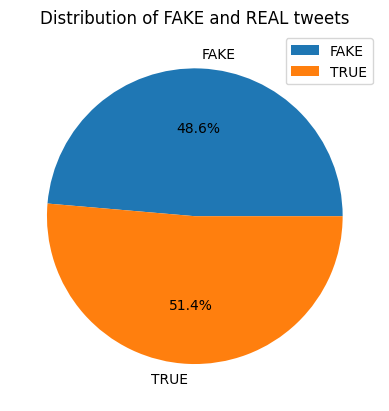

In [13]:
plt.pie([fake, real], labels = ['FAKE', 'TRUE'], autopct = '%1.1f%%')
plt.title('Distribution of FAKE and REAL tweets')
plt.legend()
plt.show()

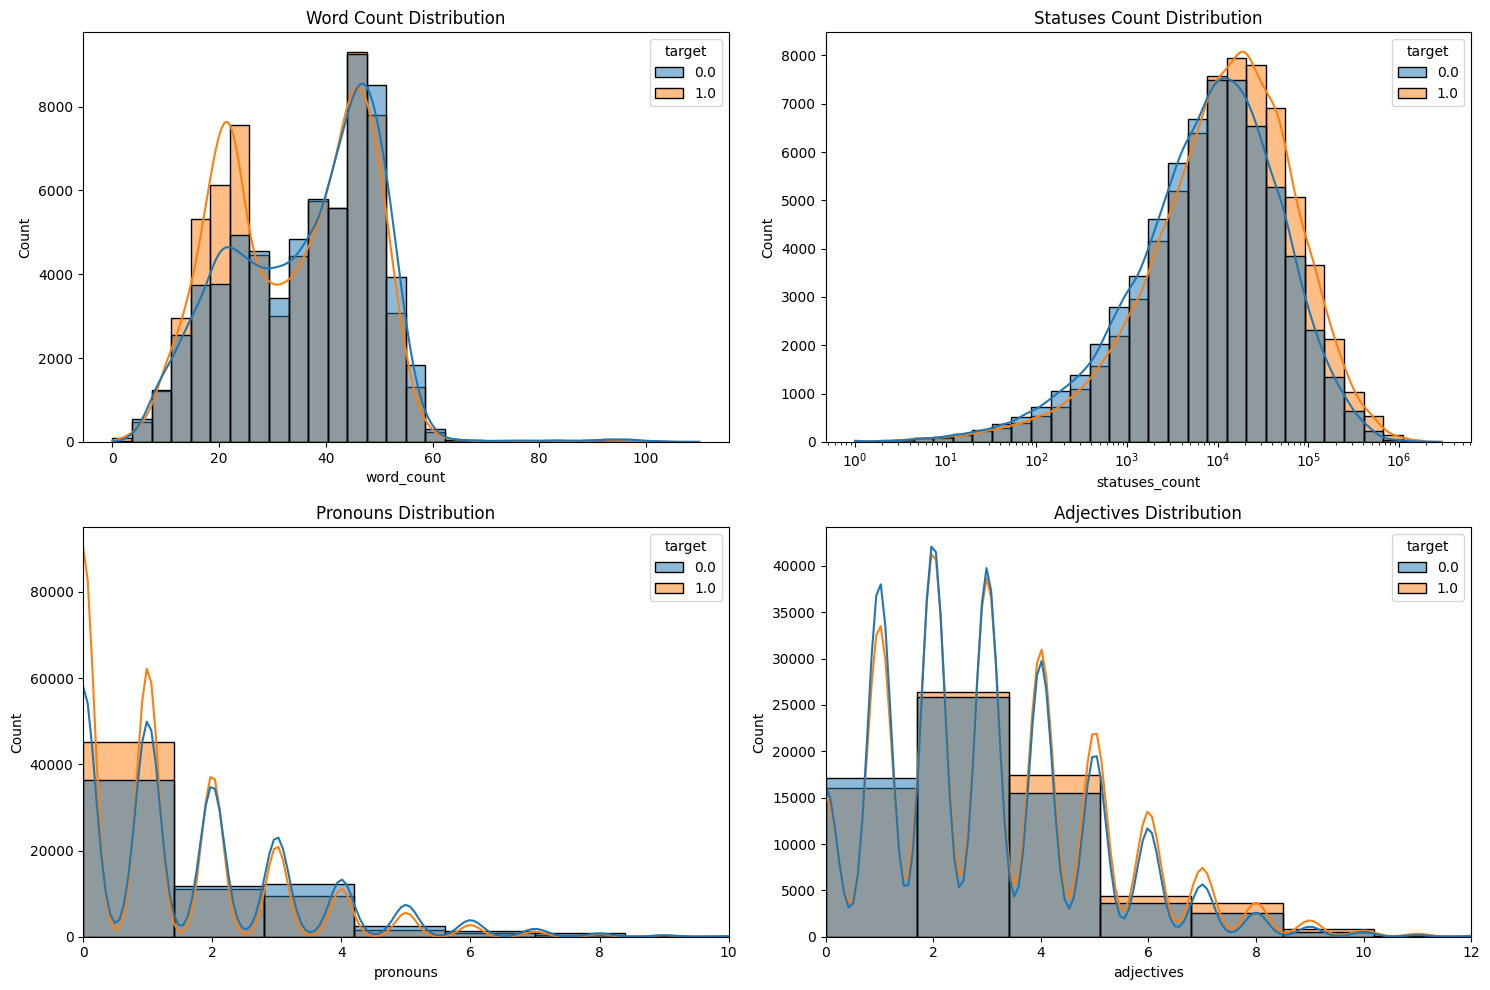

In [14]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.histplot(data = df, x = 'word_count', hue = 'target', bins = 30, ax = axes[0, 0], kde = True)
axes[0, 0].set_title('Word Count Distribution')

sns.histplot(data = df, x = 'statuses_count', hue = 'target', bins = 30, ax = axes[0, 1], kde = True, log_scale = True)
axes[0, 1].set_title('Statuses Count Distribution')

sns.histplot(data = df, x = 'pronouns', hue = 'target', bins = 10, ax = axes[1, 0], kde = True)
axes[1, 0].set_title('Pronouns Distribution')
axes[1, 0].set_xlim(0, 10)

sns.histplot(data = df, x = 'adjectives', hue = 'target', bins = 10, ax = axes[1, 1], kde = True)
axes[1, 1].set_title('Adjectives Distribution')
axes[1, 1].set_xlim(0, 12)

plt.tight_layout()
plt.show()



In [15]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # @Mentions
    text = re.sub(r'@\w+', '', text)
    # Hashtag
    text = re.sub(r'#', '', text)
    # Special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [16]:
df['tweet_clean'] = df['tweet'].apply(preprocess_text)
fake_news = df[df['target'] == 0]['tweet_clean'].values
real_news = df[df['target'] == 1]['tweet_clean'].values

In [17]:
def get_top_ngrams(text, n = 1, top_k = 15):
    vectorizer = CountVectorizer(
        ngram_range = (n, n),
        stop_words = 'english',
        max_features = 5000
    ).fit(text)

    bag_of_words = vectorizer.transform(text)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

    return words_freq[:top_k]

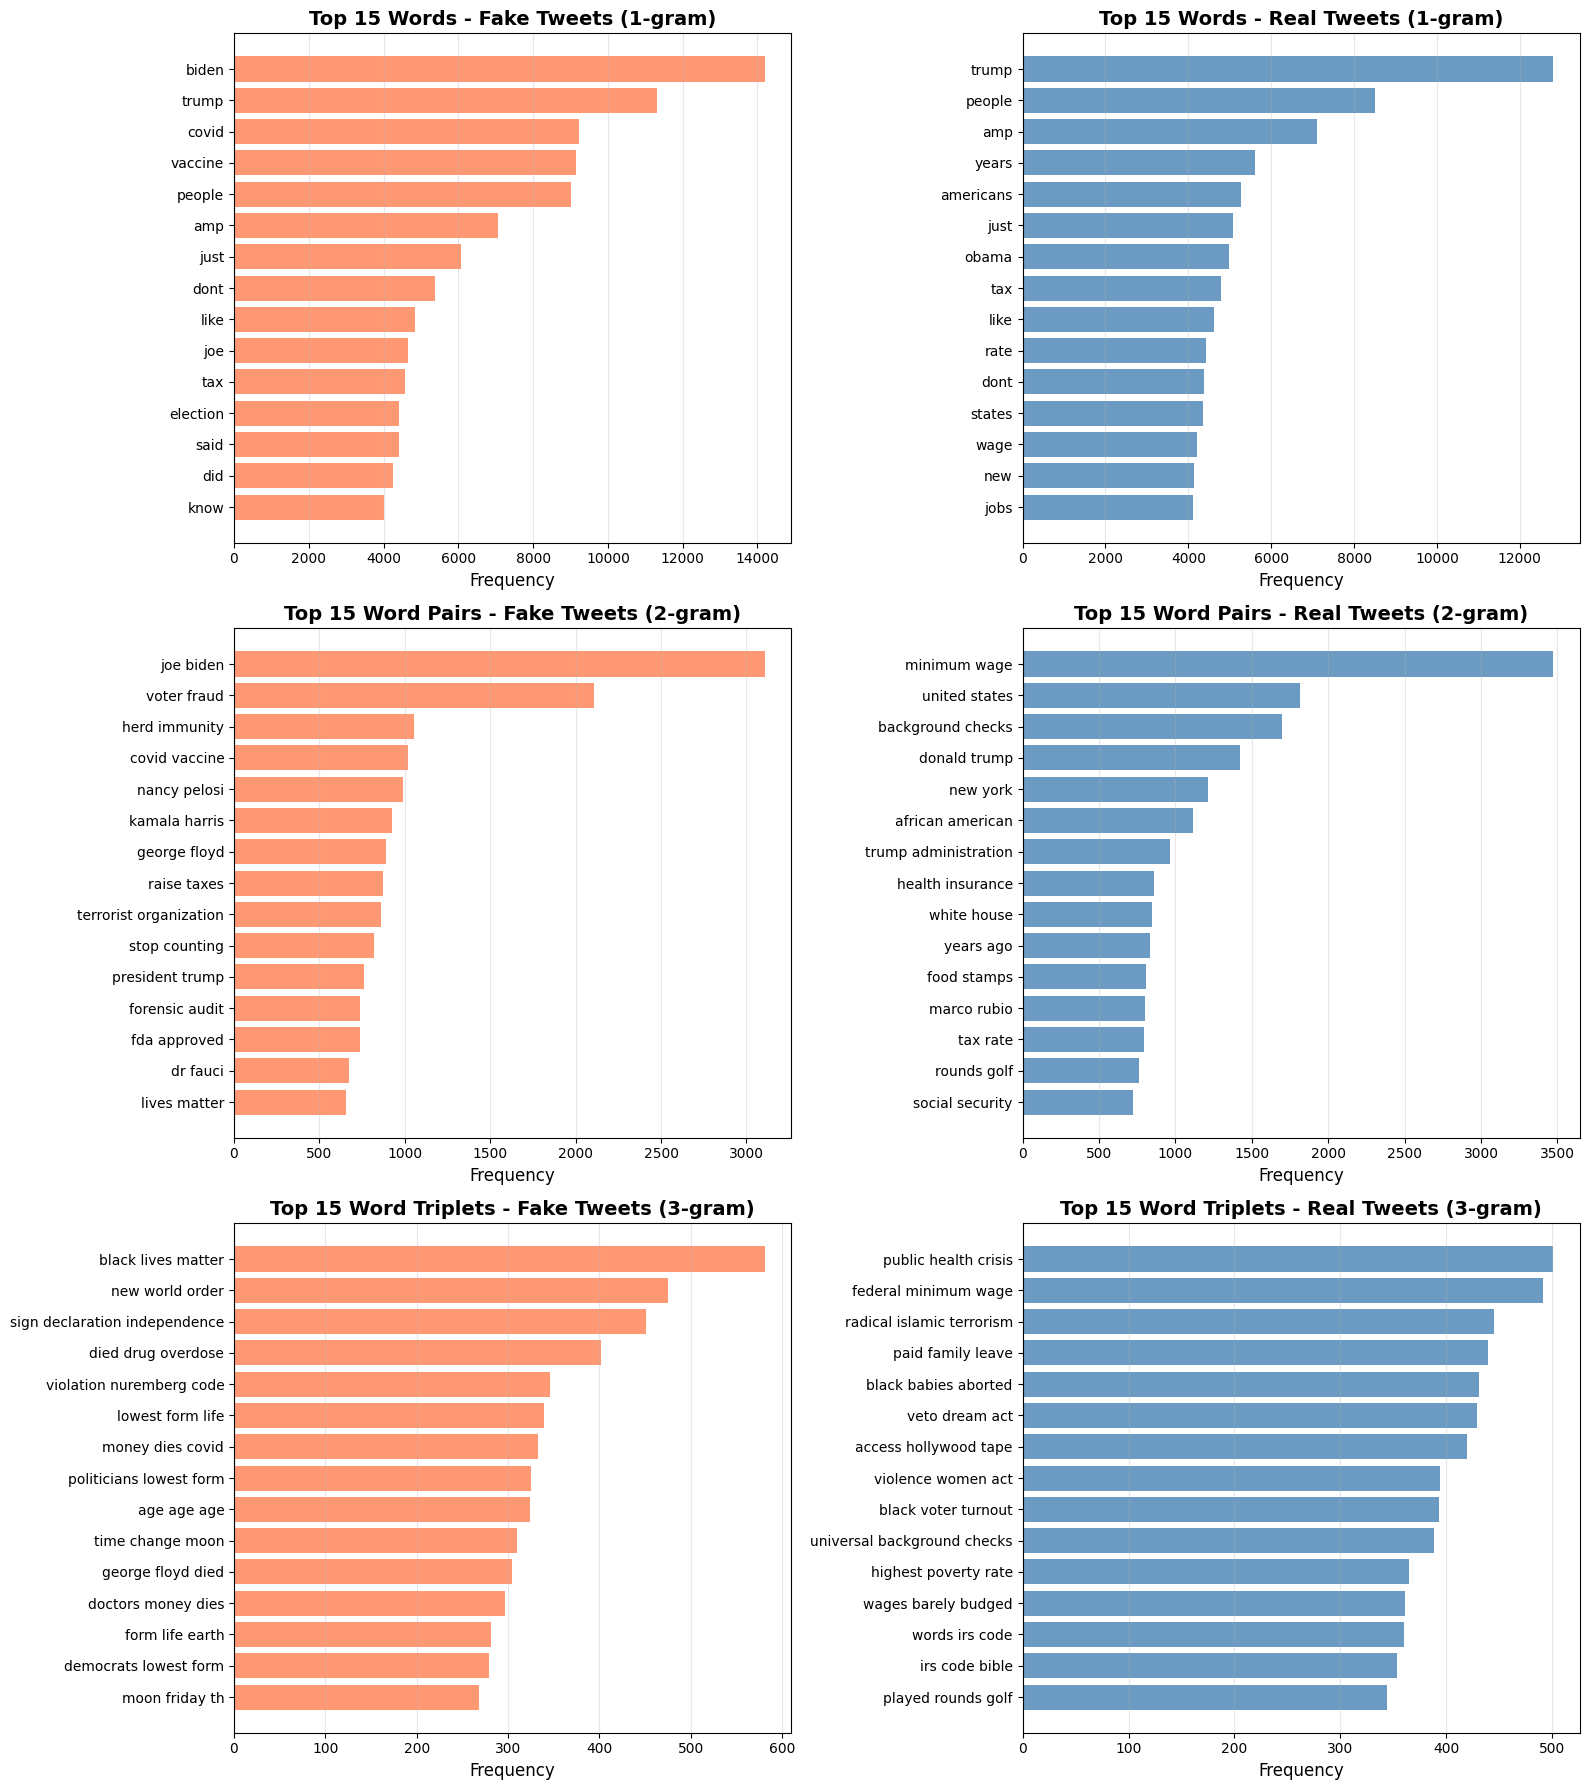

In [18]:
fig, axes = plt.subplots(3, 2, figsize = (16, 18))

ngram_config = [
    {'n': 1, 'name': 'Words', 'gram_type': '1-gram'},
    {'n': 2, 'name': 'Word Pairs', 'gram_type': '2-gram'},
    {'n': 3, 'name': 'Word Triplets', 'gram_type': '3-gram'}
]

for row_idx, config in enumerate(ngram_config):
    n = config['n']
    name = config['name']
    gram_type = config['gram_type']

    fake_ngrams = get_top_ngrams(fake_news, n = n)
    real_ngrams = get_top_ngrams(real_news, n = n)

    fake_words = [item[0] for item in fake_ngrams]
    fake_counts = [item[1] for item in fake_ngrams]
    axes[row_idx, 0].barh(fake_words, fake_counts, color = 'coral', alpha = 0.8)
    axes[row_idx, 0].set_xlabel('Frequency', fontsize = 12)
    axes[row_idx, 0].set_title(f'Top 15 {name} - Fake Tweets ({gram_type})',
                              fontsize = 14, fontweight = 'bold')
    axes[row_idx, 0].invert_yaxis()
    axes[row_idx, 0].grid(axis = 'x', alpha = 0.3)

    real_words = [item[0] for item in real_ngrams]
    real_counts = [item[1] for item in real_ngrams]
    axes[row_idx, 1].barh(real_words, real_counts, color = 'steelblue', alpha = 0.8)
    axes[row_idx, 1].set_xlabel('Frequency', fontsize = 12)
    axes[row_idx, 1].set_title(f'Top 15 {name} - Real Tweets ({gram_type})',
                              fontsize = 14, fontweight = 'bold')
    axes[row_idx, 1].invert_yaxis()
    axes[row_idx, 1].grid(axis = 'x', alpha = 0.3)

plt.tight_layout()
plt.show()

In [19]:
df_num = df.drop(columns = ['tweet', 'tweet_clean'], axis = 1)
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype = 'bool'))

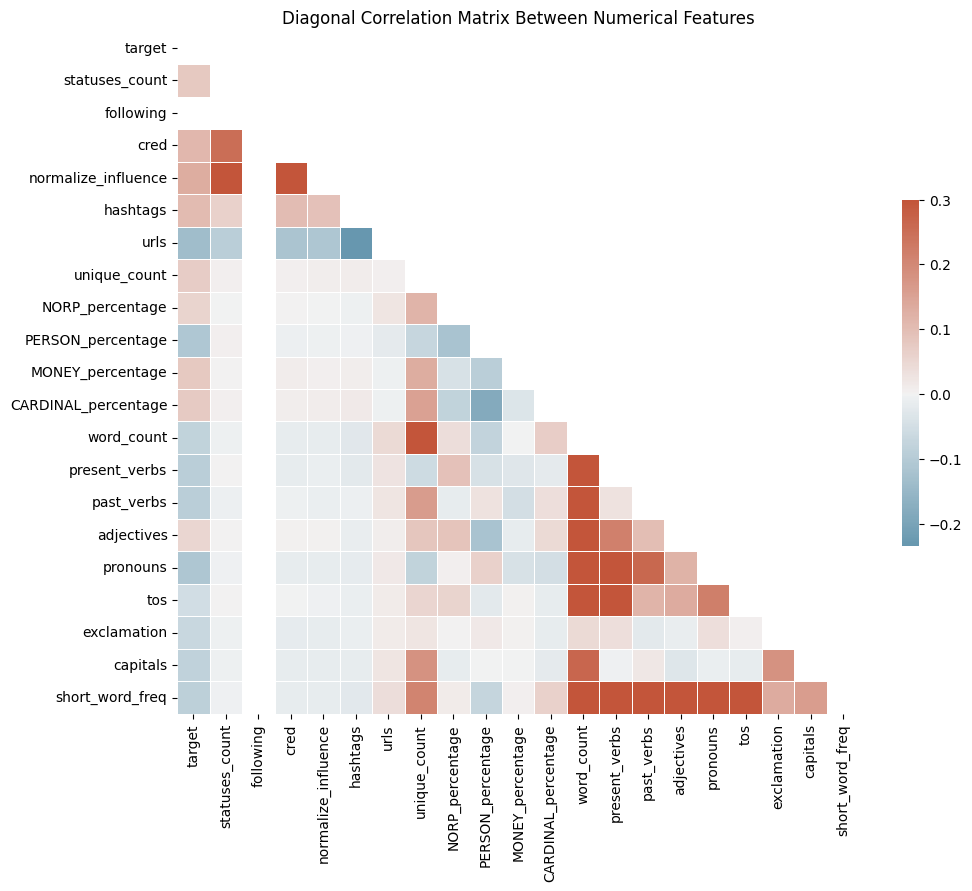

In [20]:
fig, ax = plt.subplots(figsize = (11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, square = True, linewidths = .5, cbar_kws = {'shrink': .5})
plt.title('Diagonal Correlation Matrix Between Numerical Features')

plt.show()

In [21]:
fake_text = ' '.join(fake_news)
real_text = ' '.join(real_news)

In [22]:
wordcloud_config = {
    'width': 800,
    'height': 800,
    'background_color': 'white',
    'colormap': 'Reds',
    'max_words': 100,
    'relative_scaling': 0.5,
    'min_font_size': 10,
    'stopwords': 'english'
}

In [23]:
fake_wordcloud = WordCloud(**{**wordcloud_config, 'colormap': 'Reds', 'stopwords': STOPWORDS}).generate(fake_text)
real_wordcloud = WordCloud(**{**wordcloud_config, 'colormap': 'Blues', 'stopwords': STOPWORDS}).generate(real_text)

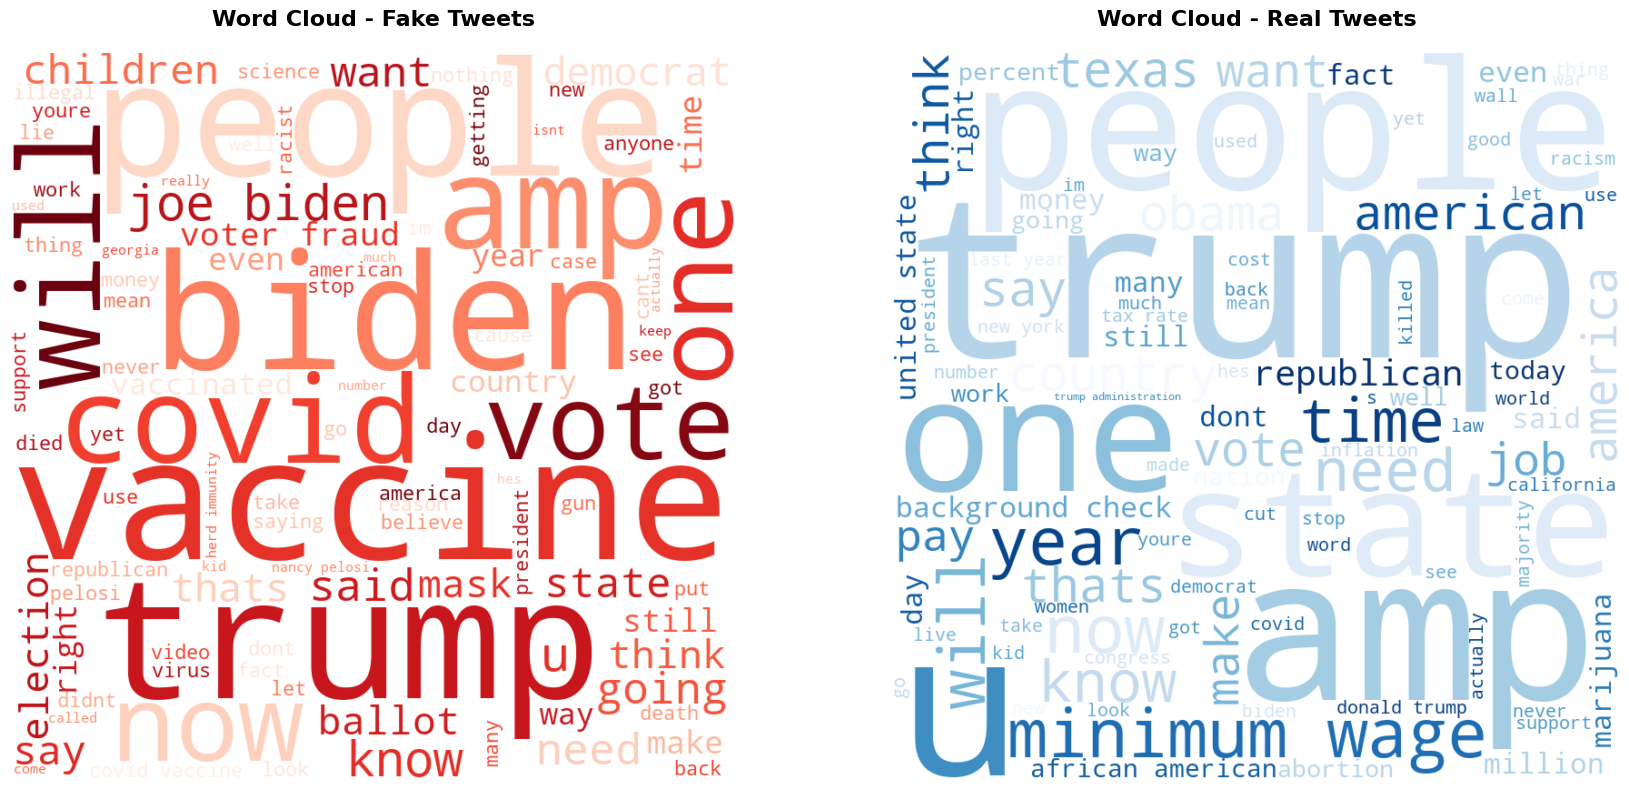

In [24]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8))

axes[0].imshow(fake_wordcloud, interpolation = 'bilinear')
axes[0].set_title('Word Cloud - Fake Tweets', fontsize = 16, fontweight = 'bold', pad = 20)
axes[0].axis('off')

axes[1].imshow(real_wordcloud, interpolation = 'bilinear')
axes[1].set_title('Word Cloud - Real Tweets', fontsize = 16, fontweight = 'bold', pad = 20)
axes[1].axis('off')

plt.tight_layout()
plt.show()

# CNN + LSTM + MLP

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer  # pyright: ignore[reportMissingImports]
from tensorflow.keras.preprocessing.sequence import pad_sequences  # pyright: ignore[reportMissingImports]

In [26]:
tokenizer = Tokenizer(num_words = 10_000, oov_token = '<OOV>')
tokenizer.fit_on_texts(df['tweet_clean'])

In [27]:
sequences = tokenizer.texts_to_sequences(df['tweet_clean'])
MAX_LEN = 60
padded_data = pad_sequences(sequences, maxlen = MAX_LEN, padding = 'post',
                            truncating = 'post')
print(df['tweet_clean'][0])
print(padded_data[0])

biden blunders month update inflation delta mismanagement covid for kids abandoning americans in afghanistan arming the taliban s border crisis breaking job growth abuse of power many exec orders t through reconciliation eviction moratoriumwhat did i miss
[  34    1  697 3288  333 1681 4928   52   10  257 7307   77    7  525
 9239    2  550  254  155  462  834  281  589 1547    4  272  117 5687
 1682 1444  334 6610 1143    1   79   16 2900    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]


In [28]:
meta_features = df.drop(columns = ['tweet', 'tweet_clean', 'target'], axis = 1).values
target = df['target'].values

X_text_train, X_text_temp, X_meta_train, X_meta_temp, y_train, y_temp = train_test_split(
    padded_data, meta_features, target,
    test_size = 0.3, random_state = 42, stratify = target
)

X_text_val, X_text_test, X_meta_val, X_meta_test, y_val, y_test = train_test_split(
    X_text_temp, X_meta_temp, y_temp,
    test_size = 0.5, random_state = 42, stratify = y_temp
)

In [29]:
from keras.models import Model
from keras.layers import (
    Input, Dense, Conv1D, LSTM, Dropout, Bidirectional,
    MaxPooling1D, GlobalMaxPooling1D, concatenate, Add,
    Embedding, BatchNormalization, SpatialDropout1D,
    Layer, Attention, MultiHeadAttention
)
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pickle

In [30]:
VOCAB_SIZE = 10_000
EMBEDDING_DIM = 128
NUM_META_FEATURES = X_meta_train.shape[1]

text_input = Input(shape= (MAX_LEN, ), name = 'text_input')
embedding = Embedding(
    input_dim = VOCAB_SIZE, 
    output_dim = EMBEDDING_DIM, 
    input_length = MAX_LEN,
    name = 'embedding'
)(text_input)
embedding = SpatialDropout1D(0.2)(embedding)

conv1 = Conv1D(filters = 64, kernel_size = 2, activation = 'relu', padding = 'same')(embedding)
conv2 = Conv1D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same')(embedding)
conv3 = Conv1D(filters = 64, kernel_size = 4, activation = 'relu', padding = 'same')(embedding)

conv_concat = concatenate([conv1, conv2, conv3])
conv_concat = BatchNormalization()(conv_concat)
conv_concat = MaxPooling1D(pool_size = 2)(conv_concat)

lstm_out = Bidirectional(LSTM(64, return_sequences = True, dropout = 0.2, recurrent_dropout = 0.2))(conv_concat)
lstm_out = Bidirectional(LSTM(32, return_sequences = False, dropout = 0.2))(lstm_out)
lstm_out = BatchNormalization()(lstm_out)

meta_input = Input(shape = (NUM_META_FEATURES,), name = 'meta_input')
meta_dense1 = Dense(64, activation = 'relu', kernel_regularizer = l2(0.01))(meta_input)
meta_dense1 = BatchNormalization()(meta_dense1)
meta_dense1 = Dropout(0.3)(meta_dense1)
meta_dense2 = Dense(32, activation = 'relu', kernel_regularizer = l2(0.01))(meta_dense1)
meta_dense2 = BatchNormalization()(meta_dense2)

combined = concatenate([lstm_out, meta_dense2])

dense1 = Dense(64, activation = 'relu', kernel_regularizer = l2(0.01))(combined)
dense1 = BatchNormalization()(dense1)
dense1 = Dropout(0.4)(dense1)
dense2 = Dense(32, activation = 'relu', kernel_regularizer = l2(0.01))(dense1)
dense2 = Dropout(0.3)(dense2)
output = Dense(1, activation = 'sigmoid', name = 'output')(dense2)

In [31]:
cnn_lstm_model = Model(
    inputs=[text_input, meta_input], 
    outputs = output, 
    name = 'CNN_BiLSTM_MLP'
)

cnn_lstm_model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

cnn_lstm_model.summary()

Model: "CNN_BiLSTM_MLP"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 60)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 60, 128)   │  1,280,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d   │ (None, 60, 128)   │          0 │ embedding[0][0]   │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 60, 64)    │     16,448 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 60, 64)    │     24,640 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 60, 64)    │     32,832 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 60, 192)   │          0 │ conv1d[0][0],     │
│ (Concatenate)       │                   │            │ conv1d_1[0][0],   │
│                     │                   │            │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ meta_input          │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 60, 192)   │        768 │ concatenate[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      1,344 │ meta_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 30, 192)   │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 30, 128)   │    131,584 │ max_pooling1d[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 64)        │     41,216 │ bidirectional[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      2,080 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ bidirectional_1[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,540,129 (5.88 MB)

 Trainable params: 1,539,297 (5.87 MB)

 Non-trainable params: 832 (3.25 KB)

In [32]:
callbacks = [
    EarlyStopping(
        monitor = 'val_loss',
        patience = 3,
        restore_best_weights = True,
        verbose = 1
    ),
    ReduceLROnPlateau(
        monitor = 'val_loss',
        factor = 0.5,
        patience = 2,
        min_lr = 1e-6,
        verbose = 1
    ),
    ModelCheckpoint(
        'models/cnn_lstm_best.keras',
        monitor = 'val_accuracy',
        save_best_only = True,
        verbose = 1
    )
]

cnn_lstm_history = cnn_lstm_model.fit(
    [X_text_train, X_meta_train], y_train,
    validation_data = ([X_text_val, X_meta_val], y_val),
    epochs = 15,
    batch_size = 64,
    callbacks = callbacks,
    verbose = 1
)

Epoch 1/15
1467/1468 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8413 - loss: 1.0739
Epoch 1: val_accuracy improved from None to 0.97750, saving model to models/cnn_lstm_best.keras

Epoch 1: finished saving model to models/cnn_lstm_best.keras
1468/1468 ━━━━━━━━━━━━━━━━━━━━ 58s 35ms/step - accuracy: 0.9271 - loss: 0.4894 - val_accuracy: 0.9775 - val_loss: 0.0865 - learning_rate: 0.0010
Epoch 2/15
1468/1468 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9789 - loss: 0.0801
Epoch 2: val_accuracy improved from 0.97750 to 0.97904, saving model to models/cnn_lstm_best.keras

Epoch 2: finished saving model to models/cnn_lstm_best.keras
1468/1468 ━━━━━━━━━━━━━━━━━━━━ 54s 37ms/step - accuracy: 0.9779 - loss: 0.0809 - val_accuracy: 0.9790 - val_loss: 0.0864 - learning_rate: 0.0010
Epoch 3/15
1468/1468 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9848 - loss: 0.0581
Epoch 3: val_accuracy improved from 0.97904 to 0.97919, saving model to models/cnn_lstm_best.keras

Epoch 3: finished saving

630/630 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step
CNN + BiLSTM + MLP Model - Test Set Evaluation

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.98      0.98      0.98      9791
        REAL       0.98      0.98      0.98     10339

    accuracy                           0.98     20130
   macro avg       0.98      0.98      0.98     20130
weighted avg       0.98      0.98      0.98     20130


ROC-AUC Score: 0.9977


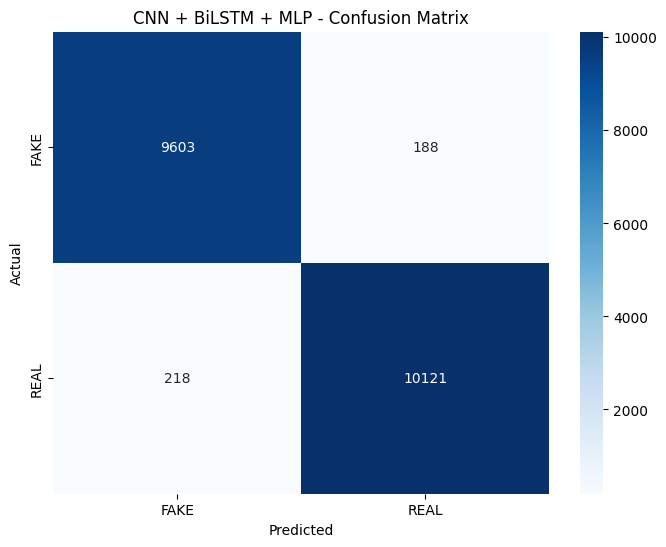

In [33]:
cnn_lstm_pred_proba = cnn_lstm_model.predict([X_text_test, X_meta_test])
cnn_lstm_pred = (cnn_lstm_pred_proba > 0.5).astype(int).flatten()

print("=" * 60)
print("CNN + BiLSTM + MLP Model - Test Set Evaluation")
print("=" * 60)
print("\nClassification Report:")
print(classification_report(y_test, cnn_lstm_pred, target_names = ['FAKE', 'REAL']))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, cnn_lstm_pred_proba):.4f}")

cm = confusion_matrix(y_test, cnn_lstm_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels = ['FAKE', 'REAL'], yticklabels = ['FAKE', 'REAL'])
plt.title('CNN + BiLSTM + MLP - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Save Model

In [34]:
import os

# Create models directory
os.makedirs('models', exist_ok=True)

# Save CNN + LSTM model
cnn_lstm_model.save('models/cnn_lstm_mlp_model.keras')

# Save tokenizer
with open('models/tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# Save configuration
config = {
    'max_len': MAX_LEN,
    'vocab_size': VOCAB_SIZE,
    'embedding_dim': EMBEDDING_DIM,
    'num_meta_features': NUM_META_FEATURES,
    'feature_columns': list(df.drop(columns=['tweet', 'tweet_clean', 'target']).columns)
}

with open('models/config.pkl', 'wb') as f:
    pickle.dump(config, f)

print("✅ Model saved successfully!")
print(f"\nSaved files:")
print(f"  - models/cnn_lstm_mlp_model.keras")
print(f"  - models/tokenizer.pkl")
print(f"  - models/config.pkl")

✅ Model saved successfully!

Saved files:
  - models/cnn_lstm_mlp_model.keras
  - models/tokenizer.pkl
  - models/config.pkl


# Training History & Final Metrics

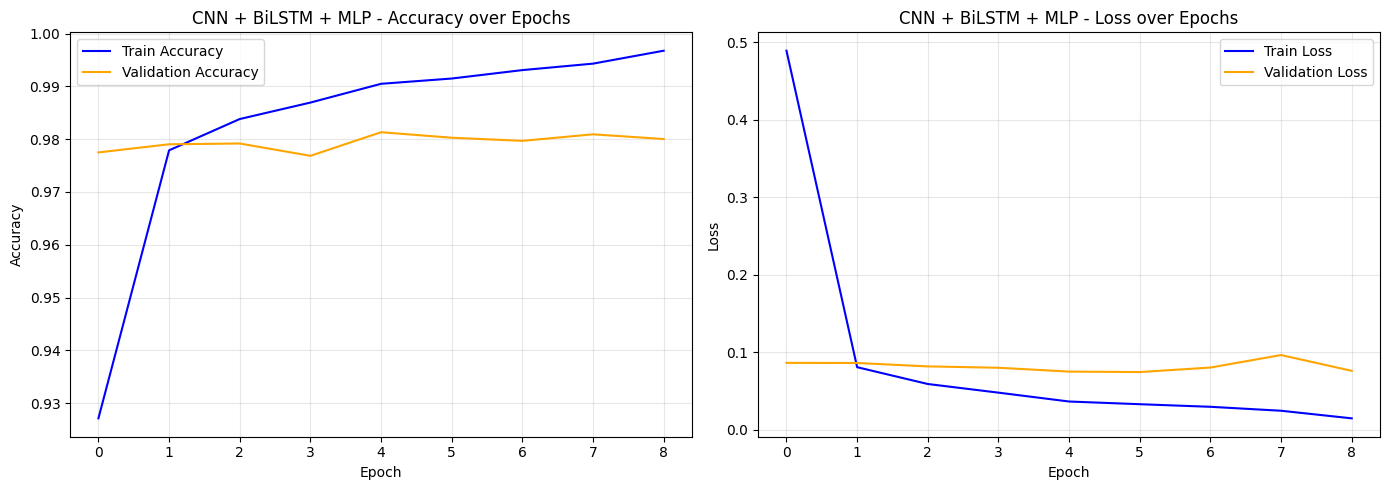

In [35]:
# Training history visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
axes[0].plot(cnn_lstm_history.history['accuracy'], label='Train Accuracy', color='blue')
axes[0].plot(cnn_lstm_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('CNN + BiLSTM + MLP - Accuracy over Epochs')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Loss plot
axes[1].plot(cnn_lstm_history.history['loss'], label='Train Loss', color='blue')
axes[1].plot(cnn_lstm_history.history['val_loss'], label='Validation Loss', color='orange')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('CNN + BiLSTM + MLP - Loss over Epochs')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

CNN + BiLSTM + MLP - FINAL METRICS
  Accuracy:  0.9798
  Precision: 0.9818
  Recall:    0.9789
  F1-Score:  0.9803
  ROC-AUC:   0.9977


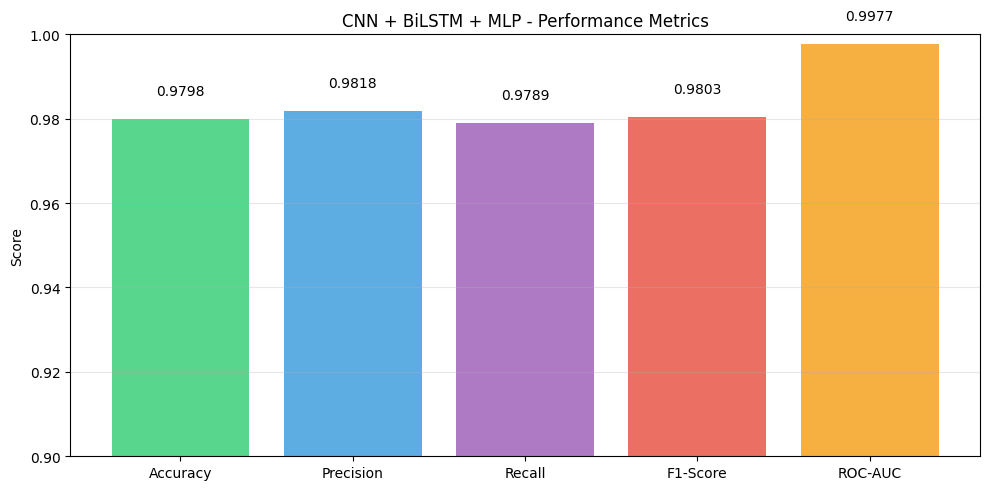

In [36]:
# Final model metrics summary
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, cnn_lstm_pred)
precision = precision_score(y_test, cnn_lstm_pred)
recall = recall_score(y_test, cnn_lstm_pred)
f1 = f1_score(y_test, cnn_lstm_pred)
roc_auc = roc_auc_score(y_test, cnn_lstm_pred_proba)

print("=" * 50)
print("CNN + BiLSTM + MLP - FINAL METRICS")
print("=" * 50)
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")
print(f"  ROC-AUC:   {roc_auc:.4f}")
print("=" * 50)

# Metrics bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
values = [accuracy, precision, recall, f1, roc_auc]

plt.figure(figsize=(10, 5))
bars = plt.bar(metrics, values, color=['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f39c12'], alpha=0.8)
plt.ylim(0.9, 1.0)
plt.ylabel('Score')
plt.title('CNN + BiLSTM + MLP - Performance Metrics')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{val:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()